Feature Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/arijitbose/Feature_engineering/main/Travel.csv')
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
data.drop('CustomerID', axis=1, inplace=True)

In [4]:
x = [feature for feature in data.columns if data[feature].dtype!='O']
x

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [5]:
categorical_varibles  = data[x]
categorical_varibles

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [6]:
for feature in categorical_varibles.columns:
    mean = categorical_varibles[feature].mean()
    categorical_varibles[feature] = categorical_varibles[feature].fillna(mean)

C:\Users\saran\AppData\Local\Temp\ipykernel_15764\2292157753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_varibles[feature] = categorical_varibles[feature].fillna(mean)


In [7]:
categorical_varibles.isnull().sum()

ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

In [8]:
dd = categorical_varibles.copy()
dd

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

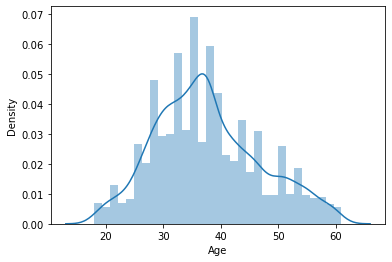

In [11]:
sns.distplot(dd.Age)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

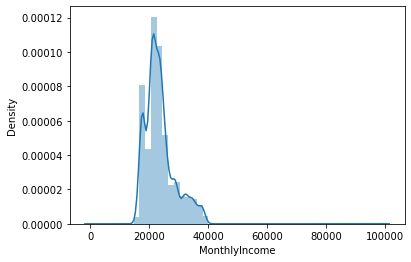

In [12]:
sns.distplot(dd.MonthlyIncome)

In [13]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
dd['Age'] = np.log(dd.Age)
dd['Age']

0       0.477962
1       0.524845
2       0.449930
3       0.417732
4       0.454538
          ...   
4883    0.524845
4884    0.369602
4885    0.539998
4886    0.245886
4887    0.442313
Name: Age, Length: 4888, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

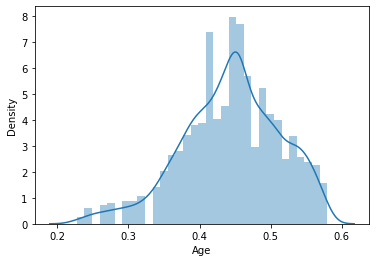

In [18]:
sns.distplot(dd['Age'])

In [19]:
dd['MonthlyIncome'] = np.log10(dd['MonthlyIncome'])
dd['MonthlyIncome']

0       4.322075
1       4.303844
2       4.232742
3       4.253071
4       4.266420
          ...   
4883    4.424490
4884    4.326582
4885    4.502700
4886    4.307261
4887    4.380953
Name: MonthlyIncome, Length: 4888, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

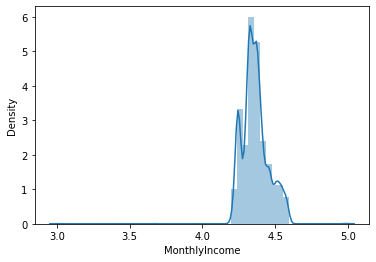

In [20]:
sns.distplot(dd.MonthlyIncome)

In [21]:
dt = categorical_varibles.copy()
dt

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [23]:
dt['Age'] = np.reciprocal(dt.Age)
dt.Age

0       0.024390
1       0.020408
2       0.027027
3       0.030303
4       0.026580
          ...   
4883    0.020408
4884    0.035714
4885    0.019231
4886    0.052632
4887    0.027778
Name: Age, Length: 4888, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

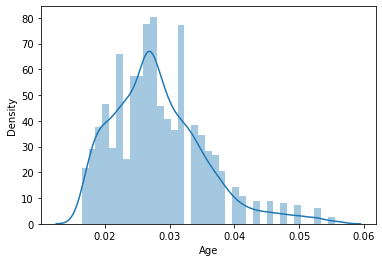

In [24]:
sns.distplot(dt.Age)

In [25]:
ds = categorical_varibles.copy()
ds

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [30]:
func = FunctionTransformer(func=np.log10)

In [31]:
func.fit_transform(ds['Age'])

0       1.612784
1       1.690196
2       1.568202
3       1.518514
4       1.575445
          ...   
4883    1.690196
4884    1.447158
4885    1.716003
4886    1.278754
4887    1.556303
Name: Age, Length: 4888, dtype: float64

In [32]:
func1 = FunctionTransformer(func=np.reciprocal)

In [35]:
ds['MonthlyIncome'] = func1.fit_transform(ds.MonthlyIncome)

In [36]:
ds.MonthlyIncome

0       0.000048
1       0.000050
2       0.000059
3       0.000056
4       0.000054
          ...   
4883    0.000038
4884    0.000047
4885    0.000031
4886    0.000049
4887    0.000042
Name: MonthlyIncome, Length: 4888, dtype: float64

In [37]:
func2 = FunctionTransformer(np.sqrt)
func2

FunctionTransformer(func=<ufunc 'sqrt'>)

In [38]:
d1 = categorical_varibles.copy()
d1

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [39]:
func2.fit_transform(d1.Age)

0       6.403124
1       7.000000
2       6.082763
3       5.744563
4       6.133699
          ...   
4883    7.000000
4884    5.291503
4885    7.211103
4886    4.358899
4887    6.000000
Name: Age, Length: 4888, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

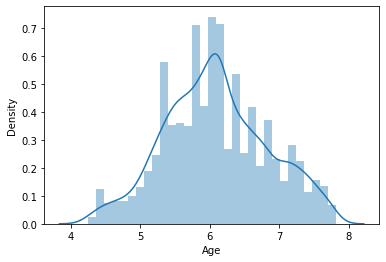

In [40]:
sns.distplot(func2.fit_transform(d1.Age))

In [42]:
d2 = categorical_varibles.copy()
d2

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [44]:
for var in d2.columns:
    value=d2[var].mean()
    d2[var]=d2[var].fillna(value) 
d2_in=d2['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='box-cox',standardize=False)
transformer.fit(d2_in)
d2_1=transformer.transform(d2_in)
#X_in

In [45]:
d2

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [46]:
for var in d2.columns:
    value=d2[var].mean()
    d2[var]=d2[var].fillna(value) 
d2_in=d2['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
transformer.fit(d2_in)
d2_1=transformer.transform(d2_in)
#X_in